# Filter AV Tweets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import glob
import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# !cd "drive/Shareddrives/Topic Modeling/data/opinion_modeling/raw_csv"
!ls 'drive/MyDrive/Topic Modeling'

 archive   doc		  figures    opinion_modeling   temp
 data	  'Fatal Crash'   notebook   src


In [ ]:
df = pd.read_csv(
    "drive/MyDrive/Topic Modeling/data/opinion_modeling/raw_csv/introduction_of_tesla_autopilot.csv"
    , lineterminator="\n"
)

In [ ]:
df["tokens"]


0        A hot lap in Audis self-driving car TG turns c...
1        A hot lap in Audis self-driving car: TG turns ...
2        A hot lap in Audis self-driving car: TG turns ...
3        A hot lap in Audis self-driving car: TG turns ...
4        Audi RS7 prototype is world's sportiest self-d...
                               ...                        
32516    $MENTION$ no, it looks really odd. I just don'...
32517    $MENTION$ I'm probably so incorrect which is f...
32518    INVESTMENT NEWS Will Tesla Unveil Automated Dr...
32519                                      $MENTION$ $URL$
32520    $MENTION$ Know innovative solar tech looking f...
Name: tokens, Length: 32521, dtype: object

In [ ]:
def remove_tags(df):
    df = df.str.replace("$", "")
    df = df.str.replace("URL", "")
    df = df.str.replace("HASHTAG", "")
    df = df.str.replace("MENTION", "")
    df = df.str.replace("RESERVED", "")
    df = df.str.replace("EMOJI", "")
    df = df.str.replace("SMILEY", "")
    df = df.str.replace("NUMBER", "")
    return df

In [ ]:
text = df.iloc[24]["tokens"]
clean_tokens = remove_tags(df["tokens"])
print(clean_tokens[1])

A hot lap in Audis self-driving car: TG turns crash-test dummy in autonomous bhp car as Audi reveals new t... 


## Sklearn NMF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF
import scipy.sparse as sparse

In [ ]:
n_samples = 2000
n_features = 1000 # num words
n_components = 10 # num topiocs
n_top_words = 20

## Remove part of speech
NLTK or SPACY

In [ ]:
import spacy
sentence = clean_tokens[1]
nlp = spacy.load("en_core_web_sm")
text = clean_tokens[1]
doc = nlp(text)

print("Noun phrases:", [chunk.text for chunk in doc.noun_chunks])
print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"])

for entity in doc.ents:
    print(entity.text, entity.label_)

Noun phrases: ['A hot lap', 'Audis self-driving car', 'TG', 'crash-test dummy', 'autonomous bhp car', 'Audi', 'new t']
Verbs: ['drive', 'turn', 'reveal']
Audi ORG


In [ ]:
import nltk
nltk.download('punkt')
sentence = clean_tokens[1]
tokens = nltk.word_tokenize(sentence)
tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['A',
 'hot',
 'lap',
 'in',
 'Audis',
 'self-driving',
 'car',
 ':',
 'TG',
 'turns',
 'crash-test',
 'dummy',
 'in',
 'autonomous',
 'bhp',
 'car',
 'as',
 'Audi',
 'reveals',
 'new',
 't',
 '...']

## Lemmatize
remove word root

In [ ]:
import nltk

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()



lemmatize_sentence = clean_tokens[1]

word_list = nltk.word_tokenize(lemmatize_sentence)
print(word_list)

lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
print(lemmatized_output)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
['A', 'hot', 'lap', 'in', 'Audis', 'self-driving', 'car', ':', 'TG', 'turns', 'crash-test', 'dummy', 'in', 'autonomous', 'bhp', 'car', 'as', 'Audi', 'reveals', 'new', 't', '...']
A hot lap in Audis self-driving car : TG turn crash-test dummy in autonomous bhp car a Audi reveals new t ...
A hot lap in Audis self-driving car: TG turns crash-test dummy in autonomous bhp car as Audi reveals new t... 


## Remove duplicate tweets
for every unique MD5, keep earliest


In [ ]:
fruits = ["apple", "banana", "cherry"]
for x in fruits:
  print(x)

apple
banana
cherry


In [ ]:
import hashlib

tweets_text = df.head(5)["tokens"]
for x in tweets_text:
    print(x)

    result = hashlib.md5(x.encode())
    print(result.digest())
    

A hot lap in Audis self-driving car TG turns crash-test dummy in autonomous $NUMBER$bhp car as Audi reveals new tech. $URL$
b'h\x8ax\x84\xbb\x95A;\x9e\xc7\xdf\xdaH\xeaG\x80'
A hot lap in Audis self-driving car: TG turns crash-test dummy in autonomous $NUMBER$bhp car as Audi reveals new t... $URL$
b'\xcd\xd5\xa2\r\x99\xe7\xe7\xfe\xf5\x07\xa1\xf4%3C\x8b'
A hot lap in Audis self-driving car: TG turns crash-test dummy in autonomous $NUMBER$bhp car as Audi reveals new t... $URL$
b'\xcd\xd5\xa2\r\x99\xe7\xe7\xfe\xf5\x07\xa1\xf4%3C\x8b'
A hot lap in Audis self-driving car: TG turns crash-test dummy in autonomous $NUMBER$bhp car as Audi reveals new t... $URL$
b'\xcd\xd5\xa2\r\x99\xe7\xe7\xfe\xf5\x07\xa1\xf4%3C\x8b'
Audi RS7 prototype is world's sportiest self-driving car [w/video]: Filed under: Motorsports, Sedan, Performan... $URL$
b's\xaa\xd1\xd3\x94\xd5U`\xeb\t2\x0c\xeb\x9d\x9fB'


## Vectorize data

In [ ]:
# random sample n_samples tweets
data_samples = clean_tokens[:100]

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(data_samples)

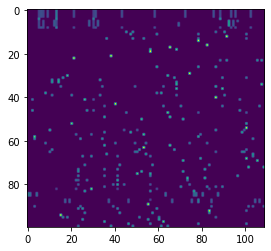

In [ ]:
# matrix sparse to dense
tfidf_dense = sparse.csr_matrix.todense(tfidf)

plt.imshow(tfidf_dense)
plt.show()

## NMF decomposition

In [ ]:
nmf = NMF(n_components=n_components, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)

## Plot results

In [ ]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

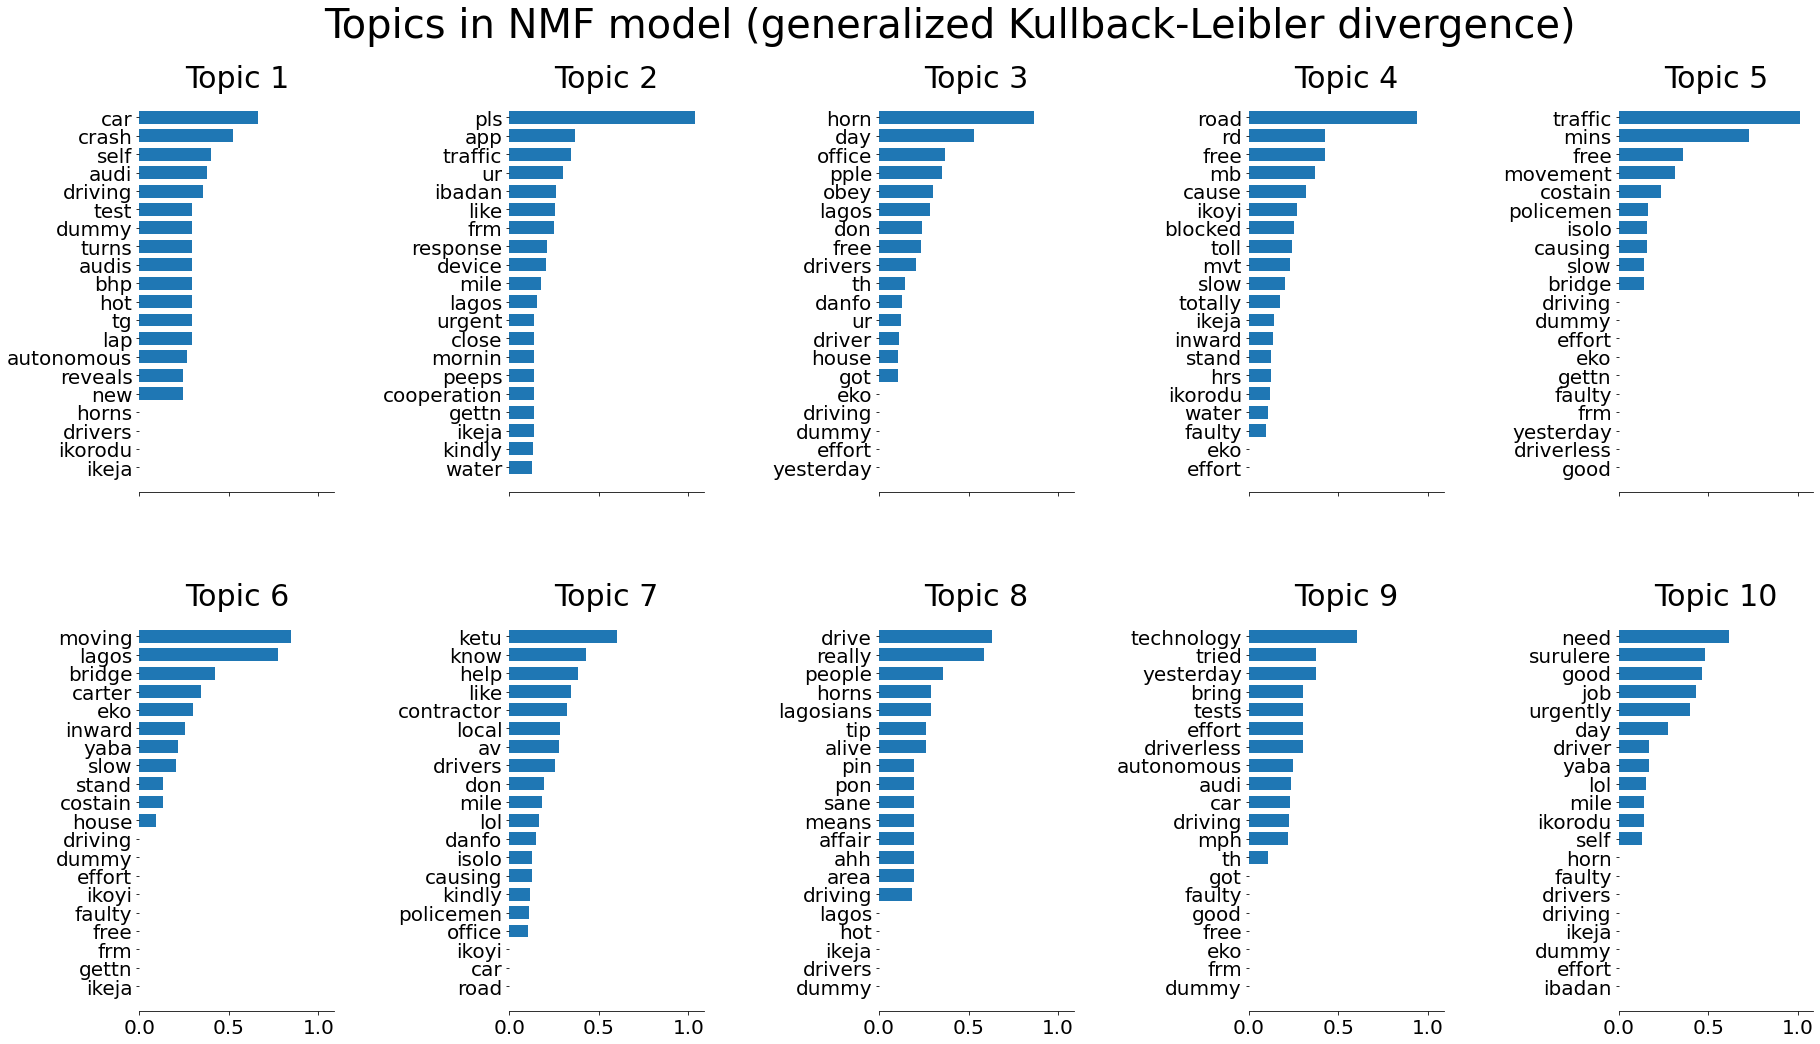

In [ ]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
plot_top_words(nmf, tfidf_feature_names, n_top_words,
               'Topics in NMF model (generalized Kullback-Leibler divergence)')

## Turtorial

rank

In [ ]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)

print(quicksort([3,6,8,10,1,2,1]))

[1, 1, 2, 3, 6, 8, 10]


types

In [ ]:
x = 3
print(type(x)) # Prints "<class 'int'>"
print(x)       # Prints "3"
print(x + 1)   # Addition; prints "4"
print(x - 1)   # Subtraction; prints "2"
print(x * 2)   # Multiplication; prints "6"
print(x ** 2)  # Exponentiation; prints "9"
x += 1
print(x)  # Prints "4"
x *= 2
print(x)  # Prints "8"
# y = 2.5
y = 1.
print(type(y)) # Prints "<class 'float'>"
print(y, y + 1, y * 2, y ** 2) # Prints "2.5 3.5 5.0 6.25"

<class 'int'>
3
4
2
6
9
4
8
<class 'float'>
1.0 2.0 2.0 1.0


logic

In [ ]:
t = True
f = False
print(type(t)) # Prints "<class 'bool'>"
print(t and f) # Logical AND; prints "False" 
print(t or f)  # Logical OR; prints "True" 
print(not t)   # Logical NOT; prints "False"
print(t != f)  # Logical XOR; prints "True"

<class 'bool'>
False
True
False
True


Strings

In [ ]:
hello = 'hello'    # String literals can use single quotes
world = "world"    # or double quotes; it does not matter.
print(hello)       # Prints "hello"
print(len(hello))  # String length; prints "5"
hw = hello + ' ' + world  # String concatenation
print(hw)  # prints "hello world"
hw12 = '%s %s %d %s' % (hello, world, 12, 13)  # sprintf style string formatting?
hw12 = '%s: %d' % ("mse", 14)
print(hw12)  # prints "hello world 12"

hello
5
hello world
mse: 14


In [ ]:
for i in range(10):
    # hw12 = '%s haotpa %d' % (i, 1 + i**2)
    # print(hw12)
    print(f"ahtm {i**2}")


ahtm 0
ahtm 1
ahtm 4
ahtm 9
ahtm 16
ahtm 25
ahtm 36
ahtm 49
ahtm 64
ahtm 81


In [ ]:
s = "hello"
print(s.capitalize())  # Capitalize a string; prints "Hello"
print(s.upper())       # Convert a string to uppercase; prints "HELLO"
print(s.rjust(7))      # Right-justify a string, padding with spaces; prints "  hello"
print(s.center(7))     # Center a string, padding with spaces; prints " hello "
print(s.replace('l', '(ell)'))  # Replace all instances of one substring with another;
                                # prints "he(ell)(ell)o"
print('  world '.strip())  # Strip leading and trailing whitespace; prints "world"

Hello
HELLO
               hello
 hello 
he(ell)(ell)o
world


Lists

In [ ]:
xs = [3, 1, 2, 4, 5]    # Create a list
print(xs, xs[2])  # Prints "[3, 1, 2] 2"
print(xs[-1])     # Negative indices count from the end of the list; prints "2"
xs[2] = 'foo'     # Lists can contain elements of different types
print(xs)         # Prints "[3, 1, 'foo']"
xs.append('bar')  # Add a new element to the end of the list
print(xs)         # Prints "[3, 1, 'foo', 'bar']"
x = xs.pop()      # Remove and return the last element of the list
print(x, xs)      # Prints "bar [3, 1, 'foo']"

[3, 1, 2, 4, 5] 2
5
[3, 1, 'foo', 4, 5]
[3, 1, 'foo', 4, 5, 'bar']
bar [3, 1, 'foo', 4, 5]


In [ ]:
nums = list(range(6))     # range is a built-in function that creates a list of integers
print(nums)               # Prints "[0, 1, 2, 3, 4]"
print(nums[2:4])          # Get a slice from index 2 to 4 (exclusive); prints "[2, 3]"
print(nums[2:])           # Get a slice from index 2 to the end; prints "[2, 3, 4]"
print(nums[:2])           # Get a slice from the start to index 2 (exclusive); prints "[0, 1]"
print(nums[:])            # Get a slice of the whole list; prints "[0, 1, 2, 3, 4]"
print(nums[:-1])          # Slice indices can be negative; prints "[0, 1, 2, 3]"
nums[2:4] = [8, 9]        # Assign a new sublist to a slice
print(nums)               # Prints "[0, 1, 8, 9, 4]"

[0, 1, 2, 3, 4, 5]
[2, 3]
[2, 3, 4, 5]
[0, 1]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4]
[0, 1, 8, 9, 4, 5]


loop

In [ ]:
animals = ['cat', 'dog', 'monkey']
for x in animals:
    print(x)
# Prints "cat", "dog", "monkey", each on its own line.

cat
dog
monkey


In [ ]:
animals = ['cat', 'dog', 'monkey']
for idx, animal in enumerate(animals):
    print('#%d: %s' % (idx + 1, animal))
# Prints "#1: cat", "#2: dog", "#3: monkey", each on its own line

#1: cat
#2: dog
#3: monkey


In [ ]:
nums = [0, 1, 2, 3, 4]
squares = []
for x in nums:
    squares.append(x ** 2)
    print(squares) 
print(squares)   # Prints [0, 1, 4, 9, 16]

[0]
[0, 1]
[0, 1, 4]
[0, 1, 4, 9]
[0, 1, 4, 9, 16]
[0, 1, 4, 9, 16]


In [ ]:
nums = [0, 1, 2, 3, 4]
squares = [x ** 2 for x in nums]
print(squares)   # Prints [0, 1, 4, 9, 16]

[0, 1, 4, 9, 16]


In [ ]:
nums = [0, 1, 2, 3, 4]
even_squares = [x ** 2 for x in nums if x % 2 == 0]
print(even_squares)  # Prints "[0, 4, 16]"

[0, 4, 16]


In [ ]:
d = {'cat': 'cute', 'dog': 'furry'}  # Create a new dictionary with some data
print(d['cat'])       # Get an entry from a dictionary; prints "cute"
print(d)
print('cat' in d)     # Check if a dictionary has a given key; prints "True"
d['fish'] = 'wet'     # Set an entry in a dictionary
print(d['fish'])      # Prints "wet"
# print(d['monkey'])  # KeyError: 'monkey' not a key of d
print(d.get('monkey', '\n'))  # Get an element with a default; prints "N/A"
print(d.get('fish', 'N/A'))    # Get an element with a default; prints "wet"
print(d.get('dog', 'N/A'))
del d['fish']         # Remove an element from a dictionary
print(d.get('fish', 'N/A')) # "fish" is no longer a key; prints "N/A"

cute
{'cat': 'cute', 'dog': 'furry'}
True
wet


wet
furry
N/A


In [ ]:
na = "a \n b"

print(d.get("cat", "dog"))

cute


loop

In [ ]:
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal in d:
    legs = d[animal]
    print('A %s has %d legs' % (animal, legs))
# Prints "A person has 2 legs", "A cat has 4 legs", "A spider has 8 legs"

A person has 2 legs
A cat has 4 legs
A spider has 8 legs


In [ ]:
nums = [0, 1, 2, 3, 4]
even_num_to_square = {x: x ** 2 for x in nums if x % 2 == 0}
print(even_num_to_square)  # Prints "{0: 0, 2: 4, 4: 16}"

{0: 0, 2: 4, 4: 16}


sets

In [ ]:
animals = {'cat', 'dog'}
print('cat' in animals)   # Check if an element is in a set; prints "True"
print('fish' in animals)  # prints "False"
animals.add('fish')       # Add an element to a set
print('fish' in animals)  # Prints "True"
print(len(animals))       # Number of elements in a set; prints "3"
animals.add('cat')        # Adding an element that is already in the set does nothing
print(len(animals))       # Prints "3"
animals.remove('cat')     # Remove an element from a set
print(len(animals))       # Prints "2"

True
False
True
3
3
2


set loop

In [ ]:
def function():
    return 0, 1

b, a = function()

print(a, b)

1 0


In [ ]:
animals = ['dog', 'cat', 'fish']
x = []

counter = 0
for animal in animals:
    if counter > 0:
        # print(counter, animal)
        # x[counter] = animals[counter]
        x.append(animal)
        # print("x", x)
    print(counter, x)
    counter += 1
        # print('#%d: %s' % (x + 1, animal))

# x = [a for a, i in enumerate(animals)]


# x_dict = {a: i for a, i in enumerate(animals)}
# print(type(x))
# print(x_dict)

# x = [animal for i, animal in enumerate(animals)]

# Prints "#1: fish", "#2: dog", "#3: cat"

# for i in range(len(animals)):
#     print(i, animals[i])

# for i, animal in enumerate(animals):
#     print(i, animal)



print("x:", x)
print(x_dict[2])

0 []
1 ['cat']
2 ['cat', 'fish']
x: ['cat', 'fish']
fish


In [ ]:
print(x)
print(x[3])

['cat', 'fish', 'dog', [1, 2]]
[1, 2]


In [ ]:
print(x)
(x != 10) | (x != 1)

10


True

In [ ]:
counter = 0
x = []
while True:
    x.append(counter)
    print(counter, x)
    counter += 1

    if counter == 10:
        break


0 [0]
1 [0, 1]
2 [0, 1, 2]
3 [0, 1, 2, 3]
4 [0, 1, 2, 3, 4]
5 [0, 1, 2, 3, 4, 5]
6 [0, 1, 2, 3, 4, 5, 6]
7 [0, 1, 2, 3, 4, 5, 6, 7]
8 [0, 1, 2, 3, 4, 5, 6, 7, 8]
9 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


numpy basics (import numpy as np)

pandas basics (import pandas as pd)

matplotlib basics (import matplotlib.pyplot plt)

linear regressioin from scratch with numpy 
1. create random data sample (1d, 3d) y = k * x + b + e, e ~ N(0, 1)
2. plot data points
3. linear regression by matrix multiplication
4. linear regression gradient descent
5. plot fitted line

sklearn basics

In [ ]:
numpy

In [ ]:
import numpy as np

a = np.array([1, 2, 3])   # Create a rank 1 array
print(type(a))            # Prints "<class 'numpy.ndarray'>"
print(a.shape)            # Prints "(3,)"
print(a[0], a[1], a[2])   # Prints "1 2 3"
a[0] = 5                  # Change an element of the array
print(a)                  # Prints "[5, 2, 3]"

b = np.array([[1,2,3],[4,5,6]])    # Create a rank 2 array
print(b.shape)                     # Prints "(2, 3)"
print(b[0, 0], b[0, 1], b[1, 0])   # Prints "1 2 4"

<class 'numpy.ndarray'>
(3,)
1 2 3
[5 2 3]
(2, 3)
1 2 4


In [ ]:
import numpy as np

a = np.zeros((2,2))   # Create an array of all zeros
print(a)              # Prints "[[ 0.  0.]
                      #          [ 0.  0.]]"

b = np.ones((1,2))    # Create an array of all ones
print(b)              # Prints "[[ 1.  1.]]"

c = np.full((2,2), 7)  # Create a constant array
print(c)               # Prints "[[ 7.  7.]
                       #          [ 7.  7.]]"

d = np.eye(2)         # Create a 2x2 identity matrix
print(d)              # Prints "[[ 1.  0.]
                      #          [ 0.  1.]]"

e = np.random.random((2,2))  # Create an array filled with random values
print(e)                     # Might print "[[ 0.91940167  0.08143941]
                             #               [ 0.68744134  0.87236687]]"

[[0. 0.]
 [0. 0.]]
[[1. 1.]]
[[7 7]
 [7 7]]
[[1. 0.]
 [0. 1.]]
[[0.04222871 0.21492388]
 [0.15232507 0.74914537]]


In [ ]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print(b)
# A slice of an array is a view into the same data, so modifying it
# will modify the original array.
print(a[0, 1])   # Prints "2"
b[0, 0] = 77     # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])   # Prints "77"

[[2 3]
 [6 7]]
2
77


In [ ]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Two ways of accessing the data in the middle row of the array.
# Mixing integer indexing with slices yields an array of lower rank,
# while using only slices yields an array of the same rank as the
# original array:
row_r1 = a[1, :]    # Rank 1 view of the second row of a
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)  # Prints "[5 6 7 8] (4,)"
print(row_r2, row_r2.shape)  # Prints "[[5 6 7 8]] (1, 4)"

# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)  # Prints "[ 2  6 10] (3,)"
print(col_r2, col_r2.shape)  # Prints "[[ 2]
                             #          [ 6]
                             #          [10]] (3, 1)"

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[ 2  6 10] (3,)
[[ 2]
 [ 6]
 [10]] (3, 1)


In [ ]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

# An example of integer array indexing.
# The returned array will have shape (3,) and
print(a[[0, 1, 2], [0, 1, 0]])  # Prints "[1 4 5]"

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))  # Prints "[1 4 5]"

# When using integer array indexing, you can reuse the same
# element from the source array:
print(a[[0, 0], [1, 1]])  # Prints "[2 2]"

# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 1]]))  # Prints "[2 2]"

[1 4 5]
[1 4 5]
[2 2]
[2 2]


In [ ]:
import numpy as np

# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])

print(a)  # prints "array([[ 1,  2,  3],
          #                [ 4,  5,  6],
          #                [ 7,  8,  9],
          #                [10, 11, 12]])"

# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"

# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10

print(a)  # prints "array([[11,  2,  3],
          #                [ 4,  5, 16],
          #                [17,  8,  9],
          #                [10, 21, 12]])

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[ 1  6  7 11]
[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


In [ ]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

aa = (a > 2)   # Find the elements of a that are bigger than 2;
                     # this returns a numpy array of Booleans of the same
                     # shape as a, where each slot of bool_idx tells
                     # whether that element of a is > 2.

print(aa)      # Prints "[[False False]
                     #          [ True  True]
                     #          [ True  True]]"

# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[aa])  # Prints "[3 4 5 6]"

# We can do all of the above in a single concise statement:
print(a[a > 2])     # Prints "[3 4 5 6]"

[[False False]
 [ True  True]
 [ True  True]]
[3 4 5 6]
[3 4 5 6]


datatypes

In [ ]:
import numpy as np

x = np.array([1, 2])   # Let numpy choose the datatype
print(x.dtype)         # Prints "int64"

x = np.array([1.0, 2.0])   # Let numpy choose the datatype
print(x.dtype)             # Prints "float64"

x = np.array([1, 2], dtype=np.int64)   # Force a particular datatype
print(x.dtype)                         # Prints "int64"

int64
float64
int64


In [ ]:
import numpy as np

x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
# [[ 6.0  8.0]
#  [10.0 12.0]]
print(x + y)
print(np.add(x, y))

# Elementwise difference; both produce the array
# [[-4.0 -4.0]
#  [-4.0 -4.0]]
print(x - y)
print(np.subtract(x, y))

# Elementwise product; both produce the array
# [[ 5.0 12.0]
#  [21.0 32.0]]
print(x * y)
print(np.multiply(x, y))

# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]
[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]
[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[1.         1.41421356]
 [1.73205081 2.        ]]


In [ ]:
import numpy as np

x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))

# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))

219
219
[29 67]
[29 67]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


In [ ]:
import numpy as np

x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


In [ ]:
import numpy as np

x = np.array([[1,2], [3,4]])
print(x)    # Prints "[[1 2]
            #          [3 4]]"
print(x.T)  # Prints "[[1 3]
            #          [2 4]]"

# Note that taking the transpose of a rank 1 array does nothing:
v = np.array([1,2,3])
print(v)    # Prints "[1 2 3]"
print(v.T)  # Prints "[1 2 3]"

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]
[1 2 3]
[1 2 3]


Broadcasting

In [ ]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

# Now y is the following
# [[ 2  2  4]
#  [ 5  5  7]
#  [ 8  8 10]
#  [11 11 13]]
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


In [ ]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
vv = np.tile(v, (4, 1))   # Stack 4 copies of v on top of each other
print(vv)                 # Prints "[[1 0 1]
                          #          [1 0 1]
                          #          [1 0 1]
                          #          [1 0 1]]"
y = x + vv  # Add x and vv elementwise
print(y)  # Prints "[[ 2  2  4
          #          [ 5  5  7]
          #          [ 8  8 10]
          #          [11 11 13]]"

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


In [ ]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print(y)  # Prints "[[ 2  2  4]
          #          [ 5  5  7]
          #          [ 8  8 10]
          #          [11 11 13]]"

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


In [ ]:
import numpy as np

# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:
# [[ 4  5]
#  [ 8 10]
#  [12 15]]
print(np.reshape(v, (3, 1)) * w)

# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:
# [[2 4 6]
#  [5 7 9]]
print(x + v)

# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:
# [[ 5  6  7]
#  [ 9 10 11]]
print((x.T + w).T)
# Another solution is to reshape w to be a column vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print(x + np.reshape(w, (2, 1)))

# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
# [[ 2  4  6]
#  [ 8 10 12]]
print(x * 2)

[[ 4  5]
 [ 8 10]
 [12 15]]
[[2 4 6]
 [5 7 9]]
[[ 5  6  7]
 [ 9 10 11]]
[[ 5  6  7]
 [ 9 10 11]]
[[ 2  4  6]
 [ 8 10 12]]


pandas


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Creating a Series by passing a list of values, letting pandas create a default integer index:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
print(s)

In [ ]:
# Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:
dates = pd.date_range("20130101", periods=6)
print(dates)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
print(df)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')
                   A         B         C         D
2013-01-01  0.022438  0.728895  0.514064 -0.693307
2013-01-02  1.237235 -0.787654  0.332347 -1.117508
2013-01-03 -0.510503 -1.381788 -0.550302  1.490968
2013-01-04 -1.552770  0.683669  0.115884 -1.350242
2013-01-05 -0.730801 -0.891377 -0.328168 -0.197839
2013-01-06  0.670093 -0.451661 -0.532919  0.126214


In [ ]:
# Creating a DataFrame by passing a dict of objects that can be converted to series-like.
df2 = pd.DataFrame(
        {
            "A": 1.0,
            "B": pd.Timestamp("20130102"),
            "C": pd.Series(1, index=list(range(3)), dtype="float32"),
            "D": np.array([3] * 3, dtype="int32"),
            "E": pd.Categorical(["test", "train", "test"]),
            "F": "foo",
        }
    )
df2  

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo


In [ ]:
# The columns of the resulting DataFrame have different dtypes.
df2.dtypes


A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [ ]:
df.head(6)

,A,B,C,D
2013-01-01,0.022438,0.728895,0.514064,-0.693307
2013-01-02,1.237235,-0.787654,0.332347,-1.117508
2013-01-03,-0.510503,-1.381788,-0.550302,1.490968
2013-01-04,-1.552770,0.683669,0.115884,-1.350242
2013-01-05,-0.730801,-0.891377,-0.328168,-0.197839
2013-01-06,0.670093,-0.451661,-0.532919,0.126214


In [ ]:
df.tail()

,A,B,C,D
2013-01-02,1.237235,-0.787654,0.332347,-1.117508
2013-01-03,-0.510503,-1.381788,-0.550302,1.490968
2013-01-04,-1.552770,0.683669,0.115884,-1.350242
2013-01-05,-0.730801,-0.891377,-0.328168,-0.197839
2013-01-06,0.670093,-0.451661,-0.532919,0.126214


In [ ]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [ ]:
df.to_numpy()

array([[ 0.02243835,  0.72889501,  0.51406442, -0.69330733],
       [ 1.2372348 , -0.78765405,  0.33234746, -1.11750806],
       [-0.51050328, -1.38178789, -0.55030212,  1.49096754],
       [-1.55276995,  0.68366859,  0.11588363, -1.35024239],
       [-0.73080147, -0.89137697, -0.32816815, -0.19783888],
       [ 0.6700934 , -0.45166111, -0.53291864,  0.12621446]])

In [ ]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo']],
      dtype=object)

In [ ]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.144051,-0.349986,-0.074849,-0.290286
std,1.006136,0.870866,0.458053,1.031999
min,-1.552770,-1.381788,-0.550302,-1.350242
25%,-0.675727,-0.865446,-0.481731,-1.011458
50%,-0.244032,-0.619658,-0.106142,-0.445573
75%,0.508180,0.399836,0.278232,0.045201
max,1.237235,0.728895,0.514064,1.490968


In [ ]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.022438,1.237235,-0.510503,-1.552770,-0.730801,0.670093
B,0.728895,-0.787654,-1.381788,0.683669,-0.891377,-0.451661
C,0.514064,0.332347,-0.550302,0.115884,-0.328168,-0.532919
D,-0.693307,-1.117508,1.490968,-1.350242,-0.197839,0.126214


In [ ]:
df.sort_index(axis=0, ascending=True)

,A,B,C,D
2013-01-01,0.022438,0.728895,0.514064,-0.693307
2013-01-02,1.237235,-0.787654,0.332347,-1.117508
2013-01-03,-0.510503,-1.381788,-0.550302,1.490968
2013-01-04,-1.552770,0.683669,0.115884,-1.350242
2013-01-05,-0.730801,-0.891377,-0.328168,-0.197839
2013-01-06,0.670093,-0.451661,-0.532919,0.126214


In [ ]:
df.sort_values(by="D")

,A,B,C,D
2013-01-04,-1.552770,0.683669,0.115884,-1.350242
2013-01-02,1.237235,-0.787654,0.332347,-1.117508
2013-01-01,0.022438,0.728895,0.514064,-0.693307
2013-01-05,-0.730801,-0.891377,-0.328168,-0.197839
2013-01-06,0.670093,-0.451661,-0.532919,0.126214
2013-01-03,-0.510503,-1.381788,-0.550302,1.490968


In [ ]:
df.sort_values(by="B")

,A,B,C,D
2013-01-03,-0.510503,-1.381788,-0.550302,1.490968
2013-01-05,-0.730801,-0.891377,-0.328168,-0.197839
2013-01-02,1.237235,-0.787654,0.332347,-1.117508
2013-01-06,0.670093,-0.451661,-0.532919,0.126214
2013-01-04,-1.552770,0.683669,0.115884,-1.350242
2013-01-01,0.022438,0.728895,0.514064,-0.693307


In [ ]:
df["A"]

2013-01-01    0.022438
2013-01-02    1.237235
2013-01-03   -0.510503
2013-01-04   -1.552770
2013-01-05   -0.730801
2013-01-06    0.670093
Freq: D, Name: A, dtype: float64

In [ ]:
df[2:5]

,A,B,C,D
2013-01-03,-0.510503,-1.381788,-0.550302,1.490968
2013-01-04,-1.552770,0.683669,0.115884,-1.350242
2013-01-05,-0.730801,-0.891377,-0.328168,-0.197839


In [ ]:
df.loc[dates[0]]

A    0.022438
B    0.728895
C    0.514064
D   -0.693307
Name: 2013-01-01 00:00:00, dtype: float64

In [ ]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,0.022438,0.728895
2013-01-02,1.237235,-0.787654
2013-01-03,-0.510503,-1.381788
2013-01-04,-1.552770,0.683669
2013-01-05,-0.730801,-0.891377
2013-01-06,0.670093,-0.451661


In [ ]:
df.loc["20130102", ["A", "B"]]

A    1.237235
B   -0.787654
Name: 2013-01-02 00:00:00, dtype: float64

In [ ]:
df.at[dates[1], "A"]

1.2372347961439294

In [ ]:
df.iloc[0]

A    0.022438
B    0.728895
C    0.514064
D   -0.693307
Name: 2013-01-01 00:00:00, dtype: float64

In [ ]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-1.552770,0.683669
2013-01-05,-0.730801,-0.891377


In [ ]:
df.iloc[[1, 2, 4], 0: 2]

,A,B
2013-01-02,1.237235,-0.787654
2013-01-03,-0.510503,-1.381788
2013-01-05,-0.730801,-0.891377


In [ ]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,1.237235,-0.787654,0.332347,-1.117508
2013-01-03,-0.510503,-1.381788,-0.550302,1.490968


In [ ]:
df.iloc[1, 1]

-0.78765405129282

In [ ]:
df.iat[1, 1]

-0.78765405129282

Boolean indexing

In [ ]:
df[df["A"] > 0]

,A,B,C,D
2013-01-01,0.022438,0.728895,0.514064,-0.693307
2013-01-02,1.237235,-0.787654,0.332347,-1.117508
2013-01-06,0.670093,-0.451661,-0.532919,0.126214


In [ ]:
df[df > 0]

,A,B,C,D
2013-01-01,0.022438,0.728895,0.514064,NaN
2013-01-02,1.237235,NaN,0.332347,NaN
2013-01-03,NaN,NaN,NaN,1.490968
2013-01-04,NaN,0.683669,0.115884,NaN
2013-01-05,NaN,NaN,NaN,NaN
2013-01-06,0.670093,NaN,NaN,0.126214


In [ ]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,-0.510503,-1.381788,-0.550302,1.490968,two
2013-01-05,-0.730801,-0.891377,-0.328168,-0.197839,four


In [ ]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1
df["F"] = s1

In [ ]:
df.at[dates[0], "A"] = 0
df.iat[0, 1] = 0
df.loc[:, "D"] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.514064,5,NaN
2013-01-02,1.237235,-0.787654,0.332347,5,1.0
2013-01-03,-0.510503,-1.381788,-0.550302,5,2.0
2013-01-04,-1.552770,0.683669,0.115884,5,3.0
2013-01-05,-0.730801,-0.891377,-0.328168,5,4.0
2013-01-06,0.670093,-0.451661,-0.532919,5,5.0


In [ ]:
df2 = df.copy()

df2[df2 > 0] = -df2

df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.514064,-5,NaN
2013-01-02,-1.237235,-0.787654,-0.332347,-5,-1.0
2013-01-03,-0.510503,-1.381788,-0.550302,-5,-2.0
2013-01-04,-1.552770,-0.683669,-0.115884,-5,-3.0
2013-01-05,-0.730801,-0.891377,-0.328168,-5,-4.0
2013-01-06,-0.670093,-0.451661,-0.532919,-5,-5.0


In [ ]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0] : dates[1], "E"] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.514064,5,NaN,1.0
2013-01-02,1.237235,-0.787654,0.332347,5,1.0,1.0
2013-01-03,-0.510503,-1.381788,-0.550302,5,2.0,NaN
2013-01-04,-1.552770,0.683669,0.115884,5,3.0,NaN


In [ ]:
df1.dropna(how="any")

,A,B,C,D,F,E
2013-01-02,1.237235,-0.787654,0.332347,5,1.0,1.0


In [ ]:
df1.fillna(value=100)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.514064,5,100.0,1.0
2013-01-02,1.237235,-0.787654,0.332347,5,1.0,1.0
2013-01-03,-0.510503,-1.381788,-0.550302,5,2.0,100.0
2013-01-04,-1.552770,0.683669,0.115884,5,3.0,100.0


In [ ]:
# To get the boolean mask where values are nan.
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


In [ ]:
df.mean(0)

A   -0.147791
B   -0.471469
C   -0.074849
D    5.000000
F    3.000000
dtype: float64

In [ ]:
df.mean(1)

2013-01-01    1.378516
2013-01-02    1.356386
2013-01-03    0.911481
2013-01-04    1.449356
2013-01-05    1.409931
2013-01-06    1.937103
Freq: D, dtype: float64

In [ ]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [ ]:
df.sub(s, axis="index")

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.510503,-2.381788,-1.550302,4.0,1.0
2013-01-04,-4.552770,-2.316331,-2.884116,2.0,0.0
2013-01-05,-5.730801,-5.891377,-5.328168,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.514064,5,NaN
2013-01-02,1.237235,-0.787654,0.846412,10,1.0
2013-01-03,0.726732,-2.169442,0.296110,15,3.0
2013-01-04,-0.826038,-1.485773,0.411993,20,6.0
2013-01-05,-1.556840,-2.377150,0.083825,25,10.0
2013-01-06,-0.886747,-2.828811,-0.449093,30,15.0


In [ ]:
df.apply(lambda x: x.max() - x.min())

A    2.790005
B    2.065456
C    1.064367
D    0.000000
F    4.000000
dtype: float64

In [ ]:
df.sub(s, axis="index")

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.510503,-2.381788,-1.550302,4.0,1.0
2013-01-04,-4.552770,-2.316331,-2.884116,2.0,0.0
2013-01-05,-5.730801,-5.891377,-5.328168,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


In [ ]:
s = pd.Series(np.random.randint(0, 7, size=10))

s

0    3
1    0
2    4
3    2
4    0
5    6
6    1
7    2
8    3
9    1
dtype: int64

In [ ]:
s.value_counts()

3    2
2    2
1    2
0    2
6    1
4    1
dtype: int64

In [ ]:
import matplotlib.pyplot as plt

plt.close("all")

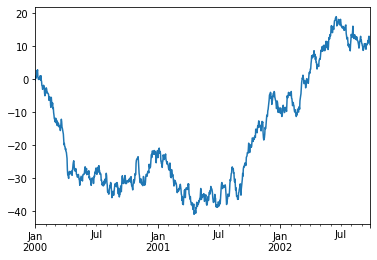

In [ ]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

ts = ts.cumsum()

ts.plot();

<Figure size 432x288 with 0 Axes>

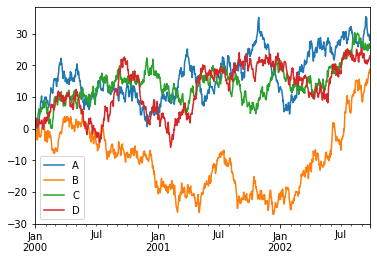

In [ ]:
In [136]: df = pd.DataFrame(
   .....:     np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
   .....: )
   .....: 

In [137]: df = df.cumsum()

In [138]: plt.figure();

In [139]: df.plot();

In [140]: plt.legend(loc='best');